# House Price Prediction in the United States

In [496]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

## Data Exploration

In [497]:
df = pd.read_csv("USA Housing Dataset.csv")

In [498]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [499]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [501]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [502]:
df.duplicated().sum()

np.int64(0)

In [503]:
# Function to check for outliers in numerical columns
def extreme_vals(column_name):
  return df[column_name].min(), df[column_name].max()

In [504]:
extreme_vals('price')

(0.0, 26590000.0)

In [505]:
print(extreme_vals('bedrooms'))
print(df['bedrooms'].unique())

(0.0, 8.0)
[3. 4. 5. 2. 1. 6. 7. 8. 0.]


In [506]:
print(extreme_vals('bathrooms'))
print(df['bathrooms'].unique())

(0.0, 6.75)
[2.   3.25 6.5  2.25 2.75 2.5  1.   4.5  1.5  1.75 3.5  3.   3.75 4.75
 4.   0.75 4.25 5.   5.25 5.5  6.25 1.25 0.   6.75]


In [507]:
print(extreme_vals('view'))
print(df['view'].unique())

(0, 4)
[0 4 1 2 3]


In [508]:
print(extreme_vals('waterfront'))
print(df['waterfront'].unique())

(0, 1)
[0 1]


In [509]:
print(extreme_vals('floors'))
print(df['floors'].unique())

(1.0, 3.5)
[3.  2.  1.  2.5 1.5 3.5]


In [510]:
print(extreme_vals('condition'))
print(df['condition'].unique())

(1, 5)
[3 5 4 2 1]


In [511]:
extreme_vals('sqft_living')

(370, 10040)

In [512]:
extreme_vals('sqft_lot')

(638, 1074218)

In [513]:
extreme_vals('sqft_above')

(370, 8020)

In [514]:
extreme_vals('sqft_basement')

(0, 4820)

In [515]:
extreme_vals('yr_built')

(1900, 2014)

In [516]:
extreme_vals('yr_renovated')

(0, 2014)

In [517]:
print(df['city'].unique())

['Seattle' 'Carnation' 'Issaquah' 'Maple Valley' 'Kent' 'Redmond'
 'Clyde Hill' 'Shoreline' 'Mercer Island' 'Auburn' 'Bellevue' 'Duvall'
 'Renton' 'Sammamish' 'Woodinville' 'Kirkland' 'Burien' 'Federal Way'
 'Normandy Park' 'Vashon' 'Kenmore' 'Yarrow Point' 'SeaTac' 'Newcastle'
 'Covington' 'Lake Forest Park' 'Snoqualmie' 'Des Moines' 'Fall City'
 'Ravensdale' 'Tukwila' 'North Bend' 'Medina' 'Bothell' 'Enumclaw'
 'Snoqualmie Pass' 'Pacific' 'Black Diamond' 'Beaux Arts Village' 'Algona'
 'Preston' 'Milton' 'Skykomish']


In [518]:
df['waterfront'].value_counts()

,count
waterfront,
0,4109
1,31


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

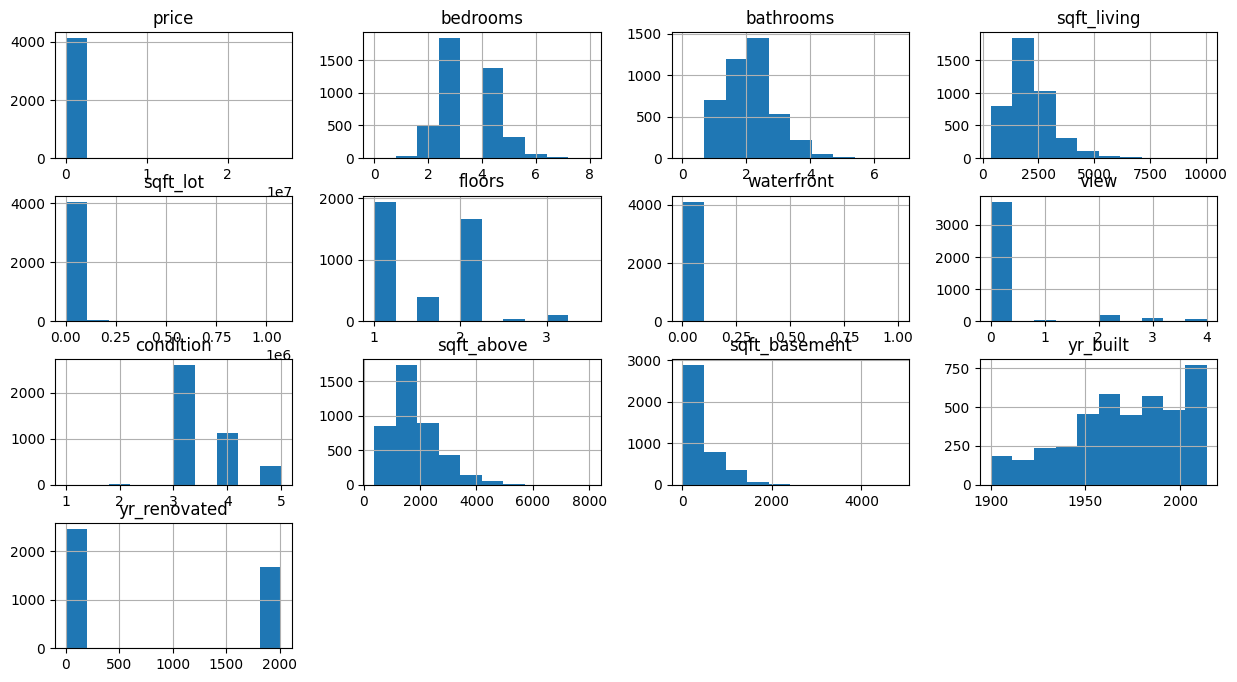

In [519]:
df.hist(figsize=(15,8))

In [520]:
df['price'] = np.log(df['price'] + 1)
df['sqft_lot'] = np.log(df['price'] + 1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

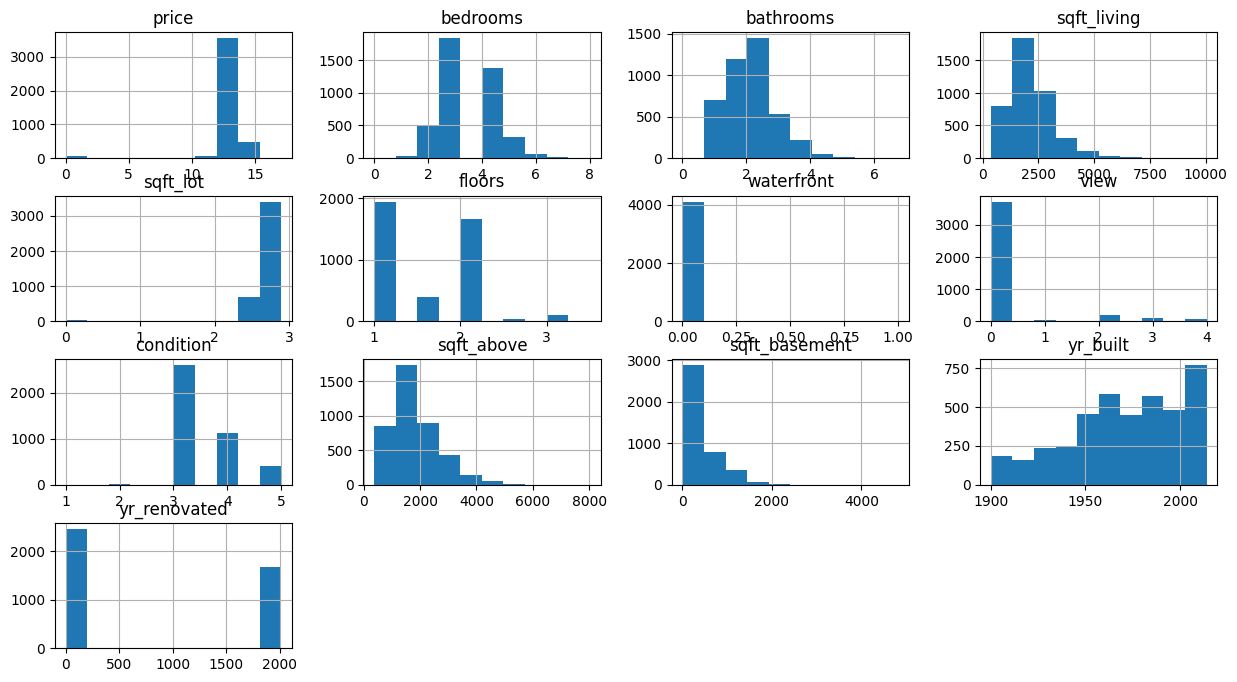

In [521]:
df.hist(figsize=(15,8))

In [522]:
df.columns.to_list()

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

## Data Cleaning


---


###  - Columns date, street and country are not useful here - remove these columns
###  - Split satezip into 2 features. One for state (then one hot encode), one for zipcode
###  - Turn cities into one hot vector
###  - There are homes with a price of 0 - remove these rows

In [523]:
columns_to_remove = ['date', 'street', 'country']

df = df.drop(columns_to_remove, axis=1)

print(df.columns.to_list())

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'statezip']


In [524]:
df['state'] = df['statezip'].str[:2]
df['zipcode'] = df['statezip'].str[-5:]

print(df['state'].unique())

['WA']


In [525]:
# all homes are in the WA state, this column becomes irrelevant
df = df.drop(['state', 'statezip'], axis=1)

In [526]:
df_nn = df.copy()

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipcode
0,12.837347,3.0,2.00,1340,2.627371,3.0,0,0,3,1340,0,2008,0,Seattle,98103
1,13.592368,4.0,3.25,3540,2.680499,2.0,0,0,3,3540,0,2007,0,Carnation,98014
2,14.621490,5.0,6.50,7270,2.748648,2.0,0,0,3,6420,850,2010,0,Issaquah,98029
3,12.688502,3.0,2.25,998,2.616556,2.0,0,0,3,798,200,2007,0,Seattle,98117
4,13.217494,5.0,2.75,3060,2.654473,1.0,0,0,5,1600,1460,1979,0,Seattle,98146


In [527]:
from sklearn.preprocessing import LabelEncoder

city_encoder = LabelEncoder()

df['city_encoded'] = city_encoder.fit_transform(df['city'])
df = df.drop('city', axis=1)

df['city_encoded'].unique()

array([34,  7, 15, 20, 17, 30,  8, 35, 22,  1,  3, 11, 31, 32, 41, 18,  6,
       14, 25, 40, 16, 42, 33, 24,  9, 19, 37, 10, 13, 29, 39, 26, 21,  5,
       12, 38, 27,  4,  2,  0, 28, 23, 36])

In [528]:
df_nn = pd.concat([df_nn, pd.get_dummies(df_nn['city'], dtype=float)], axis=1)

df_nn.drop('city', axis=1, inplace=True)
df_nn.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,12.837347,3.0,2.00,1340,2.627371,3.0,0,0,3,1340,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.592368,4.0,3.25,3540,2.680499,2.0,0,0,3,3540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.621490,5.0,6.50,7270,2.748648,2.0,0,0,3,6420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.688502,3.0,2.25,998,2.616556,2.0,0,0,3,798,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.217494,5.0,2.75,3060,2.654473,1.0,0,0,5,1600,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [529]:
df = df[df['price'] != 0]
df_nn = df_nn[df_nn['price'] != 0]

In [489]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,city_encoded
0,12.837347,3.0,2.00,1340,2.627371,3.0,0,0,3,1340,0,2008,0,98103,34
1,13.592368,4.0,3.25,3540,2.680499,2.0,0,0,3,3540,0,2007,0,98014,7
2,14.621490,5.0,6.50,7270,2.748648,2.0,0,0,3,6420,850,2010,0,98029,15
3,12.688502,3.0,2.25,998,2.616556,2.0,0,0,3,798,200,2007,0,98117,34
4,13.217494,5.0,2.75,3060,2.654473,1.0,0,0,5,1600,1460,1979,0,98146,34


In [533]:
df = df.apply(lambda col: col.astype('float32') if col.dtype in ['int64', 'float64', 'bool', 'object'] else col)
df_nn = df_nn.apply(lambda col: col.astype('float32') if col.dtype in ['int64', 'float64', 'bool', 'object'] else col)

<Axes: >

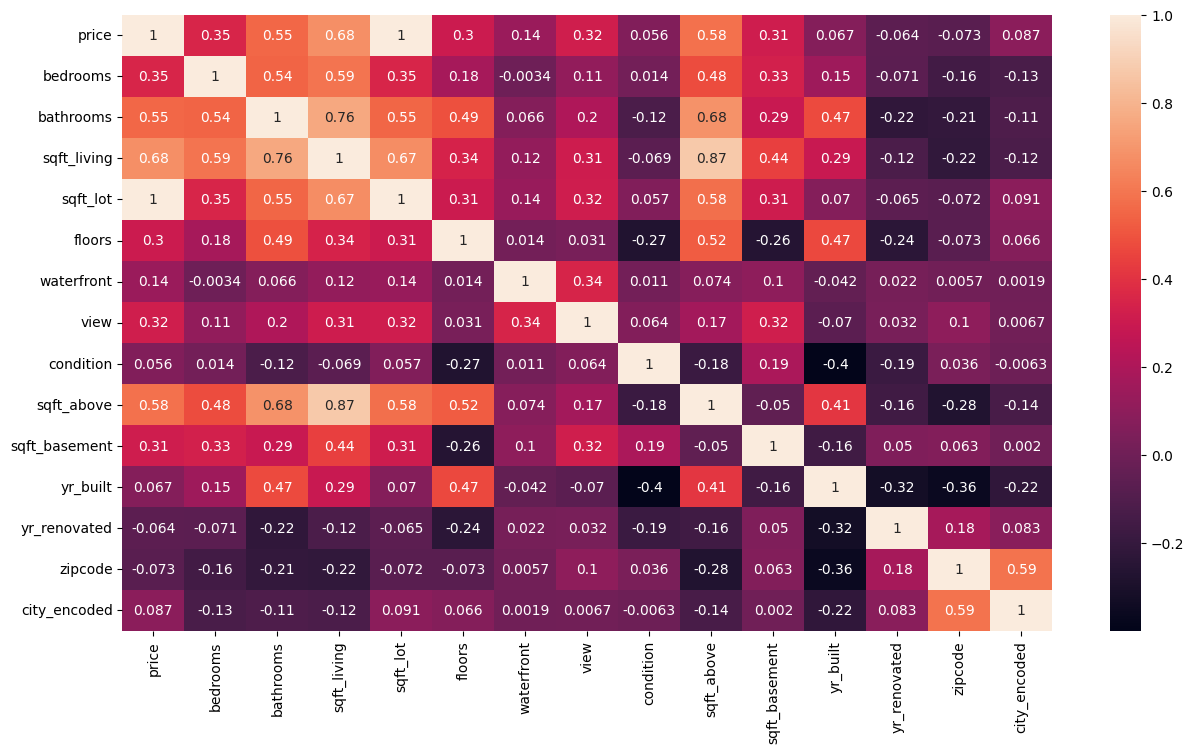

In [372]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)

In [373]:
df.drop('sqft_lot', axis=1, inplace=True)

<Axes: >

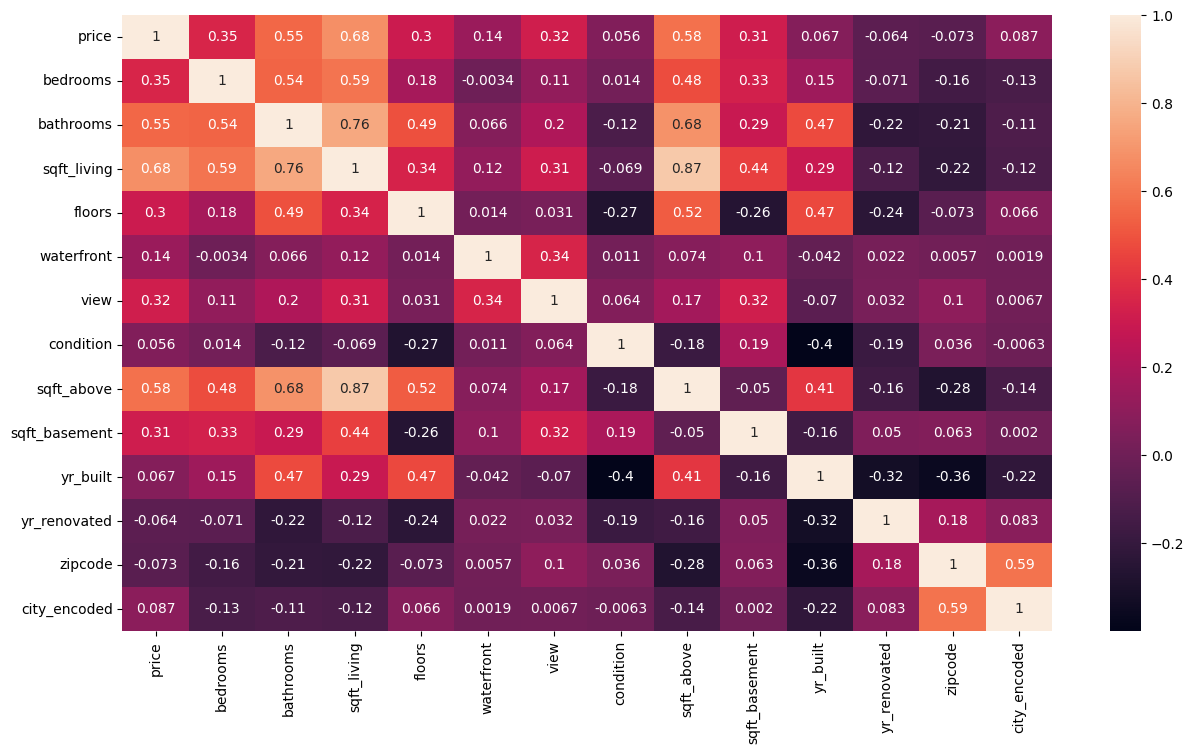

In [374]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4091 entries, 0 to 4139
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4091 non-null   float32
 1   bedrooms       4091 non-null   float32
 2   bathrooms      4091 non-null   float32
 3   sqft_living    4091 non-null   float32
 4   floors         4091 non-null   float32
 5   waterfront     4091 non-null   float32
 6   view           4091 non-null   float32
 7   condition      4091 non-null   float32
 8   sqft_above     4091 non-null   float32
 9   sqft_basement  4091 non-null   float32
 10  yr_built       4091 non-null   float32
 11  yr_renovated   4091 non-null   float32
 12  zipcode        4091 non-null   float32
 13  city_encoded   4091 non-null   float32
dtypes: float32(14)
memory usage: 255.7 KB


## Data Train and Test preparation

In [376]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [377]:
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,city_encoded
0,3.0,2.00,1340.0,3.0,0.0,0.0,3.0,1340.0,0.0,2008.0,0.0,98103.0,34.0
1,4.0,3.25,3540.0,2.0,0.0,0.0,3.0,3540.0,0.0,2007.0,0.0,98014.0,7.0
2,5.0,6.50,7270.0,2.0,0.0,0.0,3.0,6420.0,850.0,2010.0,0.0,98029.0,15.0
3,3.0,2.25,998.0,2.0,0.0,0.0,3.0,798.0,200.0,2007.0,0.0,98117.0,34.0
4,5.0,2.75,3060.0,1.0,0.0,0.0,5.0,1600.0,1460.0,1979.0,0.0,98146.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.0,1.75,1510.0,1.0,0.0,0.0,4.0,1510.0,0.0,1954.0,1979.0,98133.0,34.0
4136,3.0,2.50,1460.0,2.0,0.0,0.0,3.0,1460.0,0.0,1983.0,2009.0,98007.0,3.0
4137,3.0,2.50,3010.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009.0,0.0,98059.0,31.0
4138,4.0,2.00,2090.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974.0,0.0,98178.0,34.0


In [378]:
Y

,price
0,12.837347
1,13.592368
2,14.621490
3,12.688502
4,13.217494
...,...
4135,12.638399
4136,13.188777
4137,12.940614
4138,12.222935


In [379]:
X = X.to_numpy()
Y = Y.to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

feature_scaler = StandardScaler()
target_scaler = StandardScaler()

X_train = feature_scaler.fit_transform(X_train)
Y_train = target_scaler.fit_transform(Y_train.reshape(-1, 1)).ravel()

X_test = feature_scaler.transform(X_test)
Y_test = target_scaler.transform(Y_test.reshape(-1, 1)).ravel()

In [381]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    objective="reg:squarederror"
)

param_grid = {
    'n_estimators': [200, 500, 800, 1000],
    'learning_rate': [0.01, 0.03, 0.06, 0.1],
    'max_depth': [1, 3, 6, 9]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.03, 0.06, 0.1],
                         'max_depth': [1, 3, 6, 9],
                         'n_estimators': [200, 500, 800, 1000]},
             verbose=1)

In [382]:
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_tree = grid_search.best_estimator_

r2 = best_tree.score(X_test, Y_test)
print(f"R-squared score: {r2}")

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 800}
Best score: 0.7615455865859986
R-squared score: 0.7156528234481812


In [383]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor (
    criterion="squared_error"
)

param_grid_rf = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_features': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6],
    'max_depth': [2, 4, 6, 8]
}

grid_search_rf = GridSearchCV (
    param_grid=param_grid_rf,
    estimator=rf_model,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 500, 1000]},
             verbose=1)

In [384]:
print("Best params:", grid_search_rf.best_params_)
print("Best score:", grid_search_rf.best_score_)

best_tree_rf = grid_search_rf.best_estimator_

r2_rf = best_tree_rf.score(X_test, Y_test)
print(f"R-squared score: {r2_rf}")

Best params: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 6, 'n_estimators': 100}
Best score: 0.6546346975478305
R-squared score: 0.6214643306726673


In [534]:
import torch
import torch.nn as nn
import torch.optim as optimizer

In [535]:
X = df_nn.iloc[:, 1:]
Y = df_nn.iloc[:, 0]

In [536]:
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4091 entries, 0 to 4139
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               4091 non-null   float32
 1   bedrooms            4091 non-null   float32
 2   bathrooms           4091 non-null   float32
 3   sqft_living         4091 non-null   float32
 4   sqft_lot            4091 non-null   float32
 5   floors              4091 non-null   float32
 6   waterfront          4091 non-null   float32
 7   view                4091 non-null   float32
 8   condition           4091 non-null   float32
 9   sqft_above          4091 non-null   float32
 10  sqft_basement       4091 non-null   float32
 11  yr_built            4091 non-null   float32
 12  yr_renovated        4091 non-null   float32
 13  zipcode             4091 non-null   float32
 14  Algona              4091 non-null   float32
 15  Auburn              4091 non-null   float32
 16  Beaux Arts 

In [537]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,3.0,2.00,1340.0,2.627371,3.0,0.0,0.0,3.0,1340.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,3.25,3540.0,2.680499,2.0,0.0,0.0,3.0,3540.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,6.50,7270.0,2.748647,2.0,0.0,0.0,3.0,6420.0,850.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.25,998.0,2.616556,2.0,0.0,0.0,3.0,798.0,200.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2.75,3060.0,2.654473,1.0,0.0,0.0,5.0,1600.0,1460.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.0,1.75,1510.0,2.612889,1.0,0.0,0.0,4.0,1510.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4136,3.0,2.50,1460.0,2.652451,2.0,0.0,0.0,3.0,1460.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4137,3.0,2.50,3010.0,2.634806,2.0,0.0,0.0,3.0,3010.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4138,4.0,2.00,2090.0,2.581953,1.0,0.0,0.0,3.0,1070.0,1020.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [538]:
Y

,price
0,12.837347
1,13.592368
2,14.621490
3,12.688502
4,13.217494
...,...
4135,12.638399
4136,13.188777
4137,12.940614
4138,12.222935


In [539]:
X = X.to_numpy()
Y = Y.to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

feature_scaler = StandardScaler()
target_scaler = StandardScaler()

X_train = feature_scaler.fit_transform(X_train)
Y_train = target_scaler.fit_transform(Y_train.reshape(-1, 1)).ravel()

X_test = feature_scaler.transform(X_test)
Y_test = target_scaler.transform(Y_test.reshape(-1, 1)).ravel()

In [541]:
X_train_t = torch.from_numpy(X_train)
Y_train_t = torch.from_numpy(Y_train)

X_test_t = torch.from_numpy(X_test)
Y_test_t = torch.from_numpy(Y_test)

In [545]:
class HousePrediction(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(56, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 1),
    )

  def forward(self, x):
    return self.layers(x)

In [546]:
LEARNING_RATE : float = 0.001
EPOCHS : int = 1000

model = HousePrediction()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [547]:
loss_vals = []

for epoch in range(EPOCHS):
  optimizer.zero_grad()
  Y_pred = model(X_train_t)
  loss = criterion(Y_pred, Y_train_t)
  loss.backward()
  optimizer.step()
  print(f'Loss: {loss.detach()} at epoch: {epoch}')
  loss_vals.append(loss.detach())

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([3068])) that is different to the input size (torch.Size([3068, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Loss: 1.0528688430786133 at epoch: 0
Loss: 1.0454070568084717 at epoch: 1
Loss: 1.0383174419403076 at epoch: 2
Loss: 1.0314853191375732 at epoch: 3
Loss: 1.0250279903411865 at epoch: 4
Loss: 1.0192570686340332 at epoch: 5
Loss: 1.0144238471984863 at epoch: 6
Loss: 1.0107907056808472 at epoch: 7
Loss: 1.0086764097213745 at epoch: 8
Loss: 1.0081595182418823 at epoch: 9
Loss: 1.0087376832962036 at epoch: 10
Loss: 1.0093744993209839 at epoch: 11
Loss: 1.0093324184417725 at epoch: 12
Loss: 1.0085082054138184 at epoch: 13
Loss: 1.0071686506271362 at epoch: 14
Loss: 1.00568425655365 at epoch: 15
Loss: 1.0043562650680542 at epoch: 16
Loss: 1.0033403635025024 at epoch: 17
Loss: 1.002662181854248 at epoch: 18
Loss: 1.00226628780365 at epoch: 19
Loss: 1.0020686388015747 at epoch: 20
Loss: 1.001979947090149 at epoch: 21
Loss: 1.0019252300262451 at epoch: 22
Loss: 1.0018548965454102 at epoch: 23
Loss: 1.0017421245574951 at epoch: 24
Loss: 1.001582384109497 at epoch: 25
Loss: 1.00138258934021 at epo

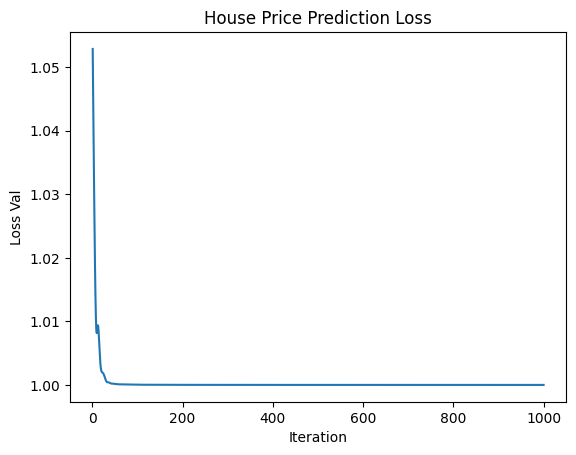

In [548]:
plt.plot(np.arange(1, EPOCHS + 1), loss_vals)

plt.xlabel("Iteration")
plt.ylabel("Loss Val")
plt.title("House Price Prediction Loss")

plt.show()

In [550]:
model.eval()
with torch.no_grad():
    Y_test_pred = model(X_test_t)
    test_loss = criterion(Y_test_pred, Y_test_t)
    print(f'Test Loss: {test_loss}')

Test Loss: 0.8796685338020325


In [552]:
from sklearn.metrics import mean_absolute_error, r2_score

Y_test_original = target_scaler.inverse_transform(Y_test_t.numpy().reshape(-1, 1))
Y_pred_original = target_scaler.inverse_transform(Y_test_pred.numpy().reshape(-1, 1))

mae = mean_absolute_error(Y_test_original, Y_pred_original)
r2 = r2_score(Y_test_original, Y_pred_original)
print(f'MAE: ${mae:,.2f}')
print(f'R²: {r2:.3f}')

MAE: $0.41
R²: -0.000
